# Desafío 1 - Maratón Behind the Code 2021

### Notebook guia

Este Jupyter Notebook te dará instrucciones para crear una solución introductoria al Desafío 1 de la Maratón. ¡Siéntete libre de editar y mejorar tu solución!

**Ten en cuenta: si estás utilizando Watson Studio, recuerda hacer que tu Notebook sea editable haciendo clic en el botón de edición de arriba.**

![](https://s3.br-sao.cloud-object-storage.appdomain.cloud/maratona-static/edit-notebook.png)

## Exploración de dataset
El primer paso para desarrollar un buen modelo de aprendizaje automático es explorar los datos con los que tenemos que trabajar. Debemos comprender lo mejor posible la relevancia de cada dato para el valor que queremos predecir. Después de todo, la predicción del modelo se basa completamente en los datos con los que se entrenó.

Hay muchas bibliotecas de Python que se pueden utilizar para el procesamiento y la visualización de datos. En este caso usaremos Pandas, Seaborn y Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Primero, cargamos el conjunto de datos del desafío en este notebook. Comencemos con el principal, `LOANS.csv`. Para eso, podemos usar el ícono de activos, disponible en la esquina superior derecha de la pantalla, e insertar el conjunto de datos como un DataFrame Pandas, como en la imagen de abajo.

<img width="300px" src="https://s3.br-sao.cloud-object-storage.appdomain.cloud/maratona-static/load-loans.png" />

Repite este procedimiento para todos los datasets que vas a utilizar.

In [2]:
# Cargue aqui el dataset
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev/desafio-1-2021/main/assets/data/LOANS.csv
df_loans = pd.read_csv(r'LOANS.csv')

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev/desafio-1-2021/main/assets/data/DEMOGRAPHICS.csv
df_demographics = pd.read_csv(r'DEMOGRAPHICS.csv')

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev/desafio-1-2021/main/assets/data/ACCOUNTS.csv
df_accounts = pd.read_csv(r'ACCOUNTS.csv')


--2021-11-19 11:21:39--  https://raw.githubusercontent.com/maratonadev/desafio-1-2021/main/assets/data/LOANS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187222 (183K) [text/plain]
Saving to: ‘LOANS.csv’

LOANS.csv           100%[===================>] 182.83K  --.-KB/s    in 0.003s  

2021-11-19 11:21:39 (58.4 MB/s) - ‘LOANS.csv’ saved [187222/187222]

--2021-11-19 11:21:39--  https://raw.githubusercontent.com/maratonadev/desafio-1-2021/main/assets/data/DEMOGRAPHICS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217434

Podemos usar los métodos .info () y .describe () para obtener información básica sobre la cantidad actual de datos, sus tipos y valores.

In [3]:
df_loans.head()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [4]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3999 non-null   int64  
 1   PAYMENT_TERM         3975 non-null   float64
 2   INSTALLMENT_PLANS    3978 non-null   object 
 3   INSTALLMENT_PERCENT  3974 non-null   float64
 4   LOAN_PURPOSE         3979 non-null   object 
 5   LOAN_AMOUNT          3981 non-null   float64
 6   OTHERS_ON_LOAN       3977 non-null   object 
 7   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 250.1+ KB


In [5]:
df_loans.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000


In [6]:
df_loans.nunique()

ID                     3999
PAYMENT_TERM            108
INSTALLMENT_PLANS         3
INSTALLMENT_PERCENT       6
LOAN_PURPOSE             11
LOAN_AMOUNT            2798
OTHERS_ON_LOAN            3
ALLOW                     2
dtype: int64

In [7]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3936 non-null   int64  
 1   SEX                         3920 non-null   object 
 2   AGE                         3918 non-null   float64
 3   JOB_TYPE                    3910 non-null   float64
 4   DEPENDENTS                  3915 non-null   float64
 5   TELEPHONE                   3915 non-null   float64
 6   FOREIGN_WORKER              3909 non-null   float64
 7   EMPLOYMENT_DURATION         3923 non-null   float64
 8   PROPERTY                    3918 non-null   object 
 9   HOUSING                     3912 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  3917 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 338.4+ KB


In [8]:
df_demographics.describe()

,ID,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION
count,3.936000e+03,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000
mean,6.614226e+05,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458
std,3.731249e+05,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873
min,9.800000e+01,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.427448e+05,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,6.679115e+05,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,9.794970e+05,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000
max,1.320082e+06,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000


In [9]:
df_demographics.nunique()

ID                            3936
SEX                              2
AGE                             52
JOB_TYPE                         4
DEPENDENTS                       2
TELEPHONE                        2
FOREIGN_WORKER                   2
EMPLOYMENT_DURATION             19
PROPERTY                         4
HOUSING                          3
CURRENT_RESIDENCE_DURATION       6
dtype: int64

In [10]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2477 non-null   int64  
 1   CHECKING_BALANCE        2467 non-null   object 
 2   CREDIT_HISTORY          2462 non-null   object 
 3   EXISTING_SAVINGS        2467 non-null   object 
 4   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.9+ KB


In [11]:
df_accounts.describe()

,ID,EXISTING_CREDITS_COUNT
count,2.477000e+03,2463.000000
mean,6.683799e+05,1.469752
std,3.730570e+05,0.569142
min,9.800000e+01,1.000000
25%,3.521920e+05,1.000000
50%,6.809460e+05,1.000000
75%,9.857560e+05,2.000000
max,1.319964e+06,3.000000


In [12]:
df_accounts.nunique()

ID                        2477
CHECKING_BALANCE          1396
CREDIT_HISTORY               5
EXISTING_SAVINGS          2238
EXISTING_CREDITS_COUNT       3
dtype: int64

La variable de destino para este desafío es `ALLOW`, es decir, si se debe permitir o no un préstamo, según la información proporcionada. Echemos un vistazo a cómo se distribuye esta variable.

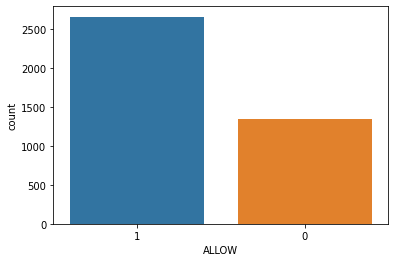

In [13]:
risk_plot = sns.countplot(data=df_loans, x='ALLOW', order=df_loans['ALLOW'].value_counts().index)
plt.show()

Siéntete libre de ver la distribución de otras columnas en el conjunto de datos, usar los otros conjuntos de datos, explorar correlaciones entre variables y más.

In [17]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``ID`` como llave.
# Merge studens tareas
df_temp = pd.merge(
    df_accounts, df_loans, how='left',
    on=None, left_on=['ID'], right_on=['ID'],
    left_index=False, right_index=False, sort=False,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df_merged = pd.merge(
    df_demographics, df_temp, how='right',
    on=None, left_on=['ID'], right_on=['ID'],
    left_index=False, right_index=False, sort=False,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2477 non-null   int64  
 1   SEX                         2467 non-null   object 
 2   AGE                         2465 non-null   float64
 3   JOB_TYPE                    2464 non-null   float64
 4   DEPENDENTS                  2461 non-null   float64
 5   TELEPHONE                   2464 non-null   float64
 6   FOREIGN_WORKER              2463 non-null   float64
 7   EMPLOYMENT_DURATION         2472 non-null   float64
 8   PROPERTY                    2465 non-null   object 
 9   HOUSING                     2465 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  2469 non-null   float64
 11  CHECKING_BALANCE            2467 non-null   object 
 12  CREDIT_HISTORY              2462 non-null   object 
 13  EXISTING_SAVINGS            2467 

In [19]:
df_merged.isnull().sum()

ID                             0
SEX                           10
AGE                           12
JOB_TYPE                      13
DEPENDENTS                    16
TELEPHONE                     13
FOREIGN_WORKER                14
EMPLOYMENT_DURATION            5
PROPERTY                      12
HOUSING                       12
CURRENT_RESIDENCE_DURATION     8
CHECKING_BALANCE              10
CREDIT_HISTORY                15
EXISTING_SAVINGS              10
EXISTING_CREDITS_COUNT        14
PAYMENT_TERM                  17
INSTALLMENT_PLANS             15
INSTALLMENT_PERCENT           18
LOAN_PURPOSE                  10
LOAN_AMOUNT                   11
OTHERS_ON_LOAN                13
ALLOW                          0
dtype: int64

In [ ]:
df_merged.to_csv(path_or_buf='merged.csv')

In [ ]:
# Adicione suas explorações

### Analisis por tipo de variable


#### Categoricas


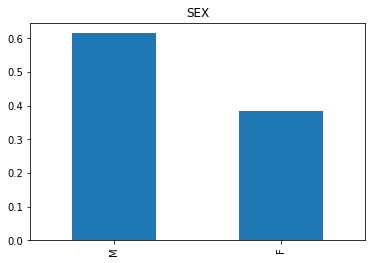

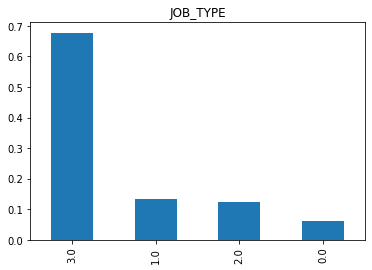

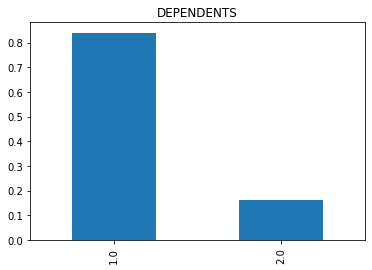

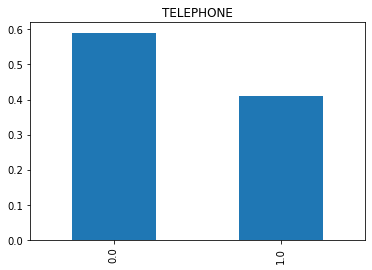

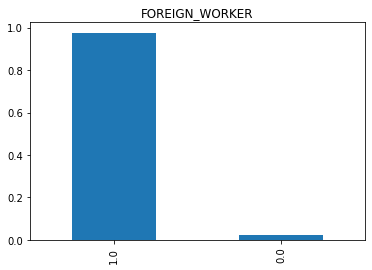

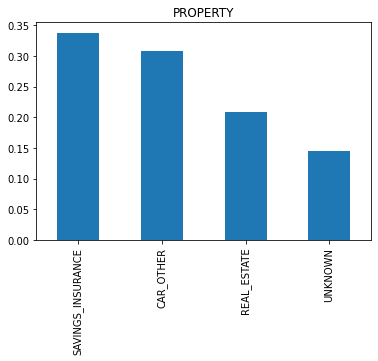

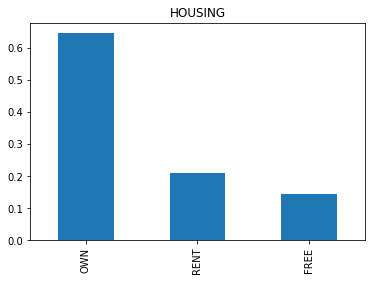

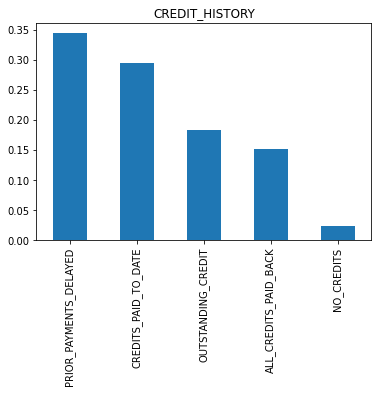

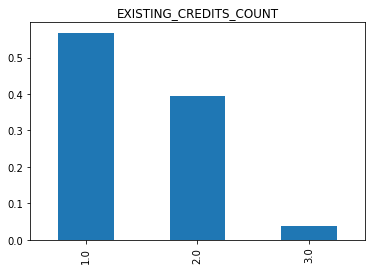

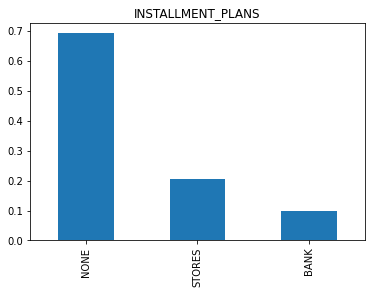

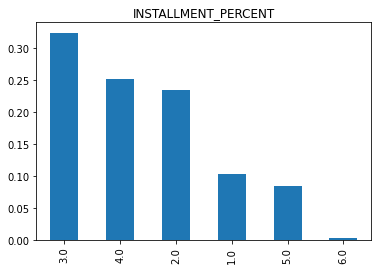

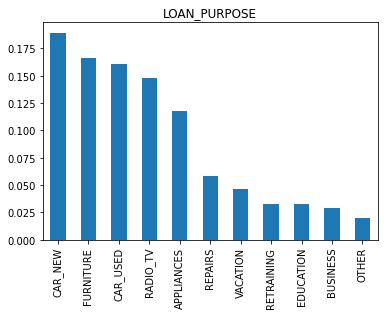

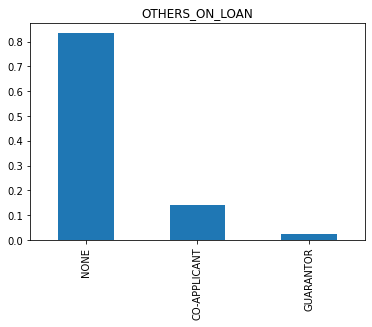

In [20]:
df_merged['SEX'].value_counts(normalize=True).plot.bar(title='SEX')
plt.show()
df_merged['JOB_TYPE'].value_counts(normalize=True).plot.bar(title='JOB_TYPE')
plt.show()
df_merged['DEPENDENTS'].value_counts(normalize=True).plot.bar(title='DEPENDENTS')
plt.show()
df_merged['TELEPHONE'].value_counts(normalize=True).plot.bar(title='TELEPHONE')
plt.show()
df_merged['FOREIGN_WORKER'].value_counts(normalize=True).plot.bar(title='FOREIGN_WORKER')
plt.show()
df_merged['PROPERTY'].value_counts(normalize=True).plot.bar(title='PROPERTY')
plt.show()
df_merged['HOUSING'].value_counts(normalize=True).plot.bar(title='HOUSING')
plt.show()
df_merged['CREDIT_HISTORY'].value_counts(normalize=True).plot.bar(title='CREDIT_HISTORY')
plt.show()
df_merged['EXISTING_CREDITS_COUNT'].value_counts(normalize=True).plot.bar(title='EXISTING_CREDITS_COUNT')
plt.show()
df_merged['INSTALLMENT_PLANS'].value_counts(normalize=True).plot.bar(title='INSTALLMENT_PLANS')
plt.show()
df_merged['INSTALLMENT_PERCENT'].value_counts(normalize=True).plot.bar(title='INSTALLMENT_PERCENT')
plt.show()
df_merged['LOAN_PURPOSE'].value_counts(normalize=True).plot.bar(title='LOAN_PURPOSE')
plt.show()
df_merged['OTHERS_ON_LOAN'].value_counts(normalize=True).plot.bar(title='OTHERS_ON_LOAN')
plt.show()



#### Numericas

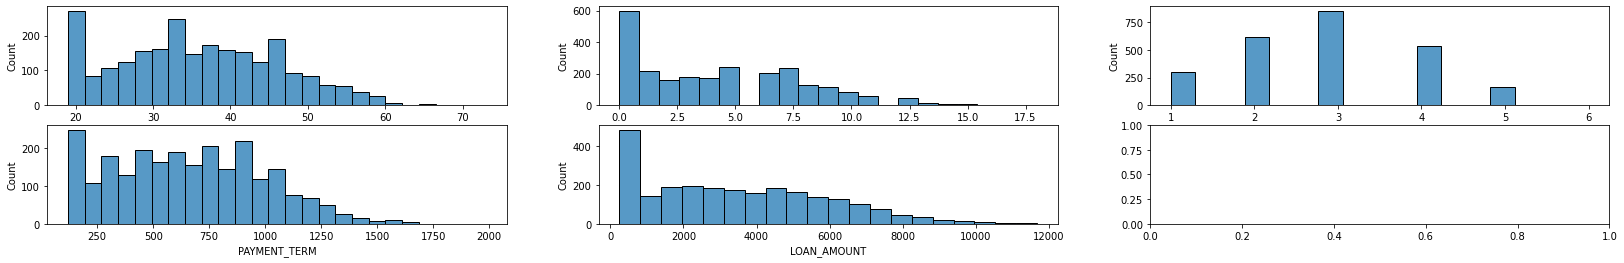

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 4))
sns.histplot(df_merged['AGE'].dropna(), ax=axes[0][0])
sns.histplot(df_merged['EMPLOYMENT_DURATION'].dropna(), ax=axes[0][1])
sns.histplot(df_merged['CURRENT_RESIDENCE_DURATION'].dropna(), ax=axes[0][2])
sns.histplot(df_merged['PAYMENT_TERM'].dropna(), ax=axes[1][0])
sns.histplot(df_merged['LOAN_AMOUNT'].dropna(), ax=axes[1][1])

### Analisis BiVariable


#### Categoricas vs Target

<AxesSubplot:xlabel='OTHERS_ON_LOAN'>

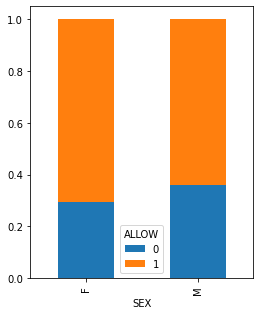

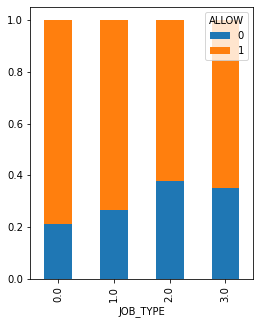

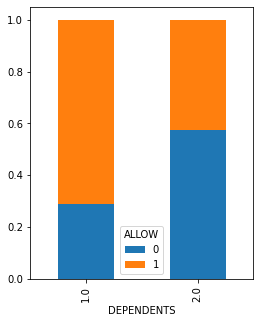

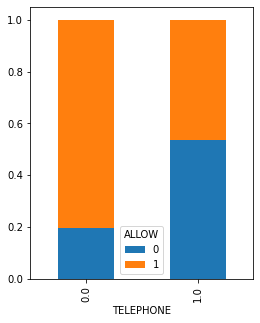

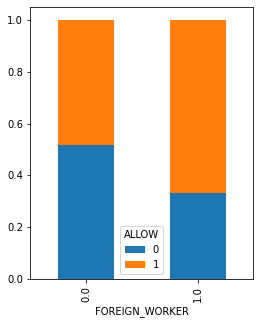

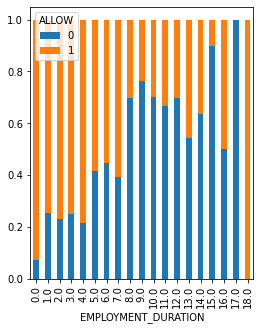

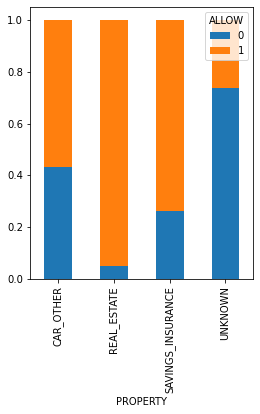

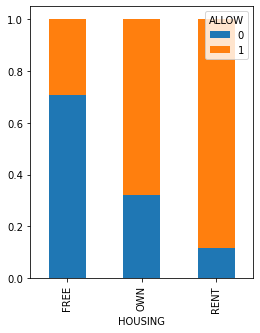

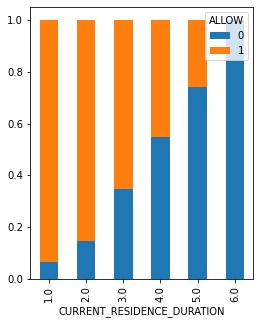

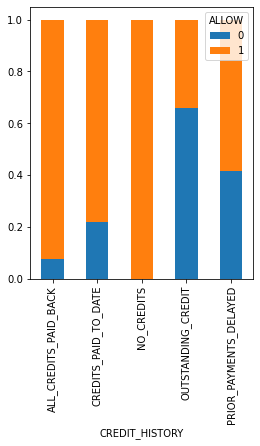

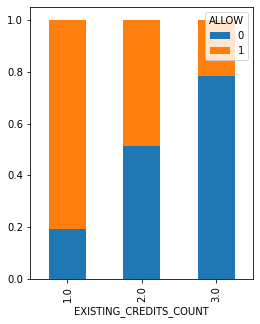

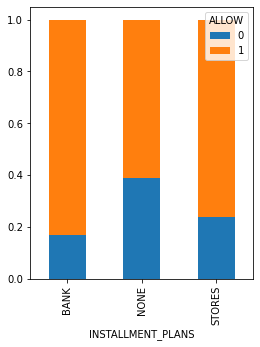

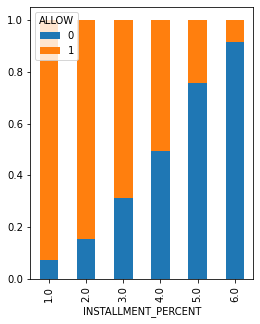

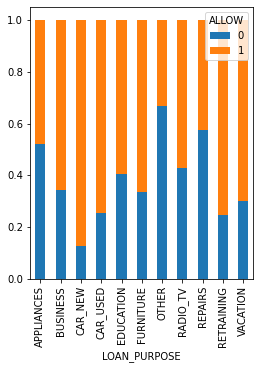

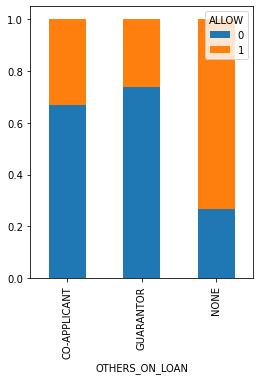

In [ ]:
SEX = pd.crosstab(df_merged['SEX'],df_merged['ALLOW'])                         
JOB_TYPE = pd.crosstab(df_merged['JOB_TYPE'],df_merged['ALLOW'])                    
DEPENDENTS = pd.crosstab(df_merged['DEPENDENTS'],df_merged['ALLOW'])                  
TELEPHONE = pd.crosstab(df_merged['TELEPHONE'],df_merged['ALLOW'])                   
FOREIGN_WORKER = pd.crosstab(df_merged['FOREIGN_WORKER'],df_merged['ALLOW'])              
EMPLOYMENT_DURATION = pd.crosstab(df_merged['EMPLOYMENT_DURATION'],df_merged['ALLOW'])         
PROPERTY = pd.crosstab(df_merged['PROPERTY'],df_merged['ALLOW'])                    
HOUSING = pd.crosstab(df_merged['HOUSING'],df_merged['ALLOW'])                     
CURRENT_RESIDENCE_DURATION = pd.crosstab(df_merged['CURRENT_RESIDENCE_DURATION'],df_merged['ALLOW'])  
CREDIT_HISTORY = pd.crosstab(df_merged['CREDIT_HISTORY'],df_merged['ALLOW'])              
EXISTING_CREDITS_COUNT = pd.crosstab(df_merged['EXISTING_CREDITS_COUNT'],df_merged['ALLOW'])      
INSTALLMENT_PLANS = pd.crosstab(df_merged['INSTALLMENT_PLANS'],df_merged['ALLOW'])           
INSTALLMENT_PERCENT = pd.crosstab(df_merged['INSTALLMENT_PERCENT'],df_merged['ALLOW'])         
LOAN_PURPOSE = pd.crosstab(df_merged['LOAN_PURPOSE'],df_merged['ALLOW'])                
OTHERS_ON_LOAN = pd.crosstab(df_merged['OTHERS_ON_LOAN'],df_merged['ALLOW'])                       


SEX.div(SEX.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
JOB_TYPE.div(JOB_TYPE.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
DEPENDENTS.div(DEPENDENTS.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
TELEPHONE.div(TELEPHONE.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
FOREIGN_WORKER.div(FOREIGN_WORKER.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
EMPLOYMENT_DURATION.div(EMPLOYMENT_DURATION.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
PROPERTY.div(PROPERTY.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
HOUSING.div(HOUSING.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
CURRENT_RESIDENCE_DURATION.div(CURRENT_RESIDENCE_DURATION.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
CREDIT_HISTORY.div(CREDIT_HISTORY.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
EXISTING_CREDITS_COUNT.div(EXISTING_CREDITS_COUNT.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
INSTALLMENT_PLANS.div(INSTALLMENT_PLANS.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
INSTALLMENT_PERCENT.div(INSTALLMENT_PERCENT.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
LOAN_PURPOSE.div(LOAN_PURPOSE.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))
OTHERS_ON_LOAN.div(OTHERS_ON_LOAN.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,5))

In [ ]:
# HeatMap
import numpy as np

plt.figure(figsize = (14, 8))
mask = np.triu(np.ones_like(df_merged.corr(), dtype=bool))

sns.heatmap(round(df_merged.corr(method = 'spearman'), 3), mask=mask,annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#### Variables Numericas vs Target

<AxesSubplot:xlabel='ALLOW'>

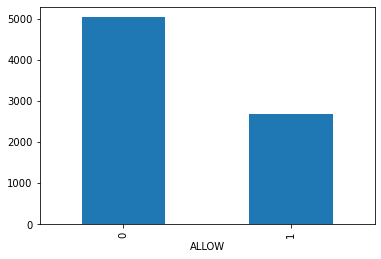

In [ ]:
df_merged.groupby('ALLOW')['LOAN_AMOUNT'].mean().plot.bar()
df_merged.groupby('ALLOW')['AGE'].mean().plot.bar()



## Procesamiento de datos

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


# Un transformador para fixear datos del Desafio1
class FixerDesafio1(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Primero realizamos la cópia del DataFrame 'X' de entrada
        df = X.copy()
        
        # Ajusto CHECKING_BALANCE creando una Nueva Columna a usar en su reemplazo.
        df['BALANCE_CHECKING'] = df["CHECKING_BALANCE"]
        df["BALANCE_CHECKING"] = df["BALANCE_CHECKING"].replace(to_replace ="NO_CHECKING",
                    value =-1)
        df['BALANCE_CHECKING'] = df['BALANCE_CHECKING'].fillna(-1)
        df["BALANCE_CHECKING"] = df["BALANCE_CHECKING"].astype(float)
        df['BALANCE_CHECKING'] = df['BALANCE_CHECKING'].apply(lambda x: 'Negativo' if (x < 0) else 'Positivo')

        # Verifico si el prestamo solicitado se puede cubrir con EXISTING_SAVINGS
        df['DINERO_DISPONIBLE'] = df["EXISTING_SAVINGS"]
        df['DINERO_DISPONIBLE'] = df['DINERO_DISPONIBLE'].fillna(-1)
        df["DINERO_DISPONIBLE"] = df["DINERO_DISPONIBLE"].replace(to_replace ="UNKNOWN",
                    value =-1)
        df["DINERO_DISPONIBLE"] = df["DINERO_DISPONIBLE"].astype(float)
        df['LOAN_AMOUNT'] = df['LOAN_AMOUNT'].fillna(df['LOAN_AMOUNT'].mean())
        df['DINERO_DISPONIBLE'] = (df['DINERO_DISPONIBLE'] > df['LOAN_AMOUNT']).map({True:'SI', False:'NO'})

        # AJUSTO LA HISTORIA CREDITICIA
        df["CREDIT_HISTORY"] = df["CREDIT_HISTORY"].fillna("UNKNOWN")
        df["CREDIT_HISTORY"] = df["CREDIT_HISTORY"].replace(to_replace ="ALL_CREDITS_PAID_BACK", value ="GOOD")
        df["CREDIT_HISTORY"] = df["CREDIT_HISTORY"].replace(to_replace ="CREDITS_PAID_TO_DATE", value ="GOOD")
        df["CREDIT_HISTORY"] = df["CREDIT_HISTORY"].replace(to_replace ="PRIOR_PAYMENTS_DELAYED", value ="BAD")
        df["CREDIT_HISTORY"] = df["CREDIT_HISTORY"].replace(to_replace ="OUTSTANDING_CREDIT", value ="BAD")

        # AJUSTO LA PROPERTY segun HOUSING para los nulos y los UNKNOWN
        df["HOUSING"] = df["HOUSING"].fillna("UNKNOWN")
        df["PROPERTY"] = df["PROPERTY"].fillna(df["HOUSING"])
        df["PROPERTY"] = df["PROPERTY"].replace(to_replace ="OWN", value ="REAL_ESTATE")
        df["PROPERTY"] = df["PROPERTY"].replace(to_replace ="RENT", value ="UNKNOWN")
        df["PROPERTY"] = df["PROPERTY"].replace(to_replace ="FREE", value ="UNKNOWN")


        return df

In [23]:
fixer = FixerDesafio1()
df_merged_fixed = fixer.fit_transform(df_merged)

In [24]:
df_merged_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2477 non-null   int64  
 1   SEX                         2467 non-null   object 
 2   AGE                         2465 non-null   float64
 3   JOB_TYPE                    2464 non-null   float64
 4   DEPENDENTS                  2461 non-null   float64
 5   TELEPHONE                   2464 non-null   float64
 6   FOREIGN_WORKER              2463 non-null   float64
 7   EMPLOYMENT_DURATION         2472 non-null   float64
 8   PROPERTY                    2477 non-null   object 
 9   HOUSING                     2477 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  2469 non-null   float64
 11  CHECKING_BALANCE            2467 non-null   object 
 12  CREDIT_HISTORY              2477 non-null   object 
 13  EXISTING_SAVINGS            2467 

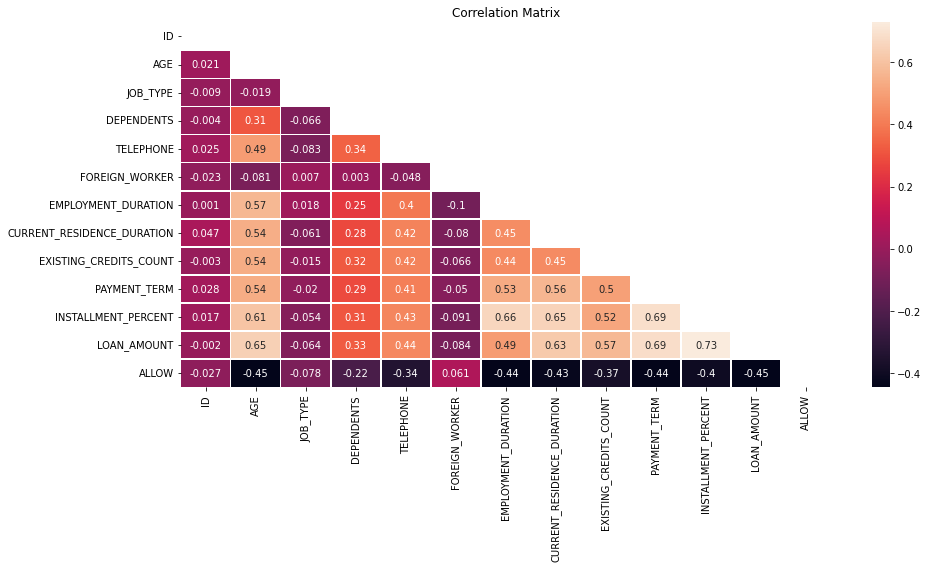

In [25]:
# HeatMap
import numpy as np

plt.figure(figsize = (14, 8))
mask = np.triu(np.ones_like(df_merged_fixed.corr(), dtype=bool))

sns.heatmap(round(df_merged_fixed.corr(method = 'spearman'), 3), mask=mask,annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Al observar la ejecución del método `.info()` anterior, podemos ver que hay tres columnas de tipo `object`. El modelo `scikit-learn` que vamos a utilizar no es capaz de procesar dicha variable. Entonces, se utiliza alguna técnica para manejar variables categóricas, como _one-hot encoding_.

Si debemos de eliminar la columna `ID`, ya que sabemos que no es información útil para la predicción (es solo un número que identifica a un cliente).

In [26]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

categoricas = [
  #'SEX',
  'PROPERTY',
  'CREDIT_HISTORY',
  'LOAN_PURPOSE',
  'OTHERS_ON_LOAN',
  'BALANCE_CHECKING',
  'DINERO_DISPONIBLE',
  #'TELEPHONE',
  'INSTALLMENT_PLANS',
]


# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

numericas = [
  'AGE',
  #'FOREIGN_WORKER',
  'EMPLOYMENT_DURATION',
  'CURRENT_RESIDENCE_DURATION',
  'PAYMENT_TERM',
]

# Define numerical pipeline
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
])

ordinales = [
  #'JOB_TYPE',
  'DEPENDENTS',
  'EXISTING_CREDITS_COUNT',
  'INSTALLMENT_PERCENT',          
]

# Define ordinal pipeline
ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])



# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer(transformers =[
    ('cat', cat_pipe, categoricas),
    ('num', num_pipe, numericas),
    ('ord', ord_pipe, ordinales),
])


## Creación del modelo

Con los datos listos, podemos seleccionar un modelo de Machine Learning para entrenar con nuestros datos. En este ejemplo, vamos a utilizar un modelo de clasificación básico, el árbol de decisiones.

Para poder evaluar el rendimiento de nuestro modelo, dividamos los datos que tenemos entre los datos de entrenamiento y de prueba, y luego, después del entrenamiento, veremos cómo le va con las predicciones.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

A continuación, separamos los datos que queremos predecir de los datos que usamos como información para la predicción.

In [68]:
target = ['ALLOW']
features = list((set(df_merged.columns) - set(target) - set(['ID'])))
X = df_merged[features]
y = df_merged[target]

In [103]:
test_pct = 0.1 # Separaremos 30% de los dados para testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)



model = XGBClassifier()

# Creando una instancia del transformador, pasando como parámetro las colunmas que no queremos
#drop_columns = DropColumns(unwanted_columns)


# Creando un Pipeline, adicionando nuestro transformador seguido de un modelo de árbol de decisión
skl_pipeline = Pipeline(steps=[
                               ('fixer', fixer),
                               ('preprocessor', preprocessor),
                               ('classification', model)
                               ]
                        )


skl_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('fixer', FixerDesafio1()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['PROPERTY', 'CREDIT_HISTORY',
                                                   'LOAN_PURPOSE',
                                                   'OTHERS_ON_LOAN',
                                                   'BALANCE_CHECKING',
                                                   'DINERO_DISPONIBLE',
                                    

## Scores del Modelo

In [104]:
y_pred = skl_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): {acc}")
f1_0 = f1_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1_0 del modelo (número de predicciones asertadas sobre el número total de pruebas): {f1_0}")
print(f"F1_1 del modelo (número de predicciones asertadas sobre el número total de pruebas): {f1_1}")

Exactitud del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.8064516129032258
F1_0 del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.6470588235294118
F1_1 del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.8666666666666666


In [105]:
y_pred_train = skl_pipeline.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)
print(f"Exactitud TRAIN del modelo (número de predicciones asertadas sobre el número total de pruebas): {acc}")
f1_0 = f1_score(y_train, y_pred_train, pos_label=0)
f1_1 = f1_score(y_train, y_pred_train, pos_label=1)
print(f"F1_0 TRAIN del modelo (número de predicciones asertadas sobre el número total de pruebas): {f1_0}")
print(f"F1_1 TRAIN del modelo (número de predicciones asertadas sobre el número total de pruebas): {f1_1}")

Exactitud TRAIN del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.8241363840287125
F1_0 TRAIN del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.712609970674487
F1_1 TRAIN del modelo (número de predicciones asertadas sobre el número total de pruebas): 0.8733031674208144


In [106]:
# Cross validation scores
from sklearn.model_selection import cross_val_score
f1_scores = cross_val_score(skl_pipeline, X, y, cv=5, scoring='f1',n_jobs=2)
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ",np.mean(f1_scores))
 

F1_scores per fold :  [0.86206897 0.85222382 0.82639885 0.86251809 0.84133916]  
Mean F1_score=  0.848909775914308


In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,digits=5, target_names=['0', '1']))

              precision    recall  f1-score   support

           0    0.66667   0.62857   0.64706        70
           1    0.85714   0.87640   0.86667       178

    accuracy                        0.80645       248
   macro avg    0.76190   0.75249   0.75686       248
weighted avg    0.80338   0.80645   0.80468       248



Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.806\nPrecision=0.857\nRecall=0.876\nF1 Score=0.8666666666666666')

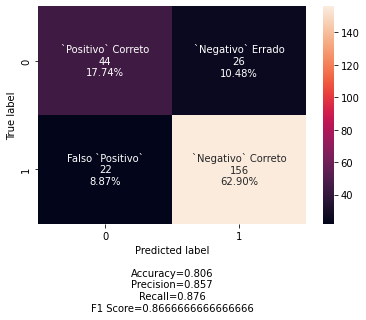

In [108]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score_m  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score_m)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

## TO BE SCORED

In [110]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev/desafio-1-2021/main/assets/data/ANSWERS.csv
to_be_scored = pd.read_csv(r'ANSWERS.csv')

y_scored = skl_pipeline.predict(to_be_scored)

--2021-11-19 11:56:19--  https://raw.githubusercontent.com/maratonadev/desafio-1-2021/main/assets/data/ANSWERS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120244 (117K) [text/plain]
Saving to: ‘ANSWERS.csv’

ANSWERS.csv         100%[===================>] 117.43K  --.-KB/s    in 0.003s  

2021-11-19 11:56:19 (33.9 MB/s) - ‘ANSWERS.csv’ saved [120244/120244]



In [111]:
scored = to_be_scored.copy()
scored['ALLOW'] = y_scored

scored.head(200)

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,OTHERS_ON_LOAN,CURRENT_RESIDENCE_DURATION,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,NONE,2,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,1
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,CO-APPLICANT,2,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,1
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,NONE,3,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,1
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,NONE,2,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,1
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,NONE,3,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,117599,NO_CHECKING,1116,PRIOR_PAYMENTS_DELAYED,APPLIANCES,5855,519.64,12,4,M,NONE,5,SAVINGS_INSURANCE,42,NONE,OWN,2,3,1,0,1,0
196,526934,NO_CHECKING,930,PRIOR_PAYMENTS_DELAYED,APPLIANCES,7074,376.12,5,3,M,GUARANTOR,3,UNKNOWN,49,NONE,FREE,1,3,1,1,1,0
197,191737,NO_CHECKING,900,OUTSTANDING_CREDIT,FURNITURE,3601,UNKNOWN,10,4,M,NONE,3,SAVINGS_INSURANCE,35,BANK,OWN,2,1,1,0,1,1
198,1168465,-490.03,330,PRIOR_PAYMENTS_DELAYED,CAR_NEW,3900,87.41,4,2,M,NONE,3,SAVINGS_INSURANCE,19,NONE,RENT,1,3,1,0,1,1


In [112]:
scored.to_csv(index=False,path_or_buf="ANSWERS.csv")

## Sobre Pipelines

Un `Pipeline`, de la librería `scikit-learn`, consta de una serie de pasos donde realizamos transformaciones de datos. Las transformaciones están definidas por clases que siempre deben tener **dos métodos**:

- **fit**: Un método que recibe datos de entrenamiento y devuelve la propia instancia de clase. Se aplica cuando se entrena para usar una canalización para entrenar un modelo.
- **transform**: Un método que toma un conjunto de datos como entrada y debe devolver otro conjunto de datos, transformado. Se aplica a cada paso del Pipeline, recibiendo los datos del paso anterior y transformándolos.

Vea a continuación una representación gráfica de cómo funciona un Pipeline:

![](https://s3.br-sao.cloud-object-storage.appdomain.cloud/maratona-static/pipeline-es.png)

En este Notebook, creamos un Pipeline muy similar al ejemplo anterior, con dos etapas:

- **drop_columns**: Remueve las columnas indeseadas del conjunto de datos de entrada.
- **classification**: Alimenta un modelo de clasificación con los datos obtenidos de la etapa de **drop_columns**, pudiendo ser tanto para entrenamiento como para obtener una predicción. 

## Deploy del modelo para Watson Machine Learning (WML)

Ahora que tenemos el modelo listo para su publicación, queremos ponerlo en línea para que el sistema de la Maratón pueda probarlo :)

Para ello, utilizaremos la biblioteca `IBM Watson Machine Learning`, que le permite encapsular modelos de Machine Learning en APIs REST.

In [ ]:
# Instalar la biblioteca WML
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 32.8 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.166
    Uninstalling ibm-watson-machine-learning-1.0.166:
      Successfully uninstalled ibm-watson-machine-learning-1.0.166


In [ ]:
from ibm_watson_machine_learning import APIClient

Si aún no lo ha creado, cree un servicio de Machine Learning aquí https://cloud.ibm.com/catalog/services/machine-learning.

Ingresa tus credenciales para el servicio en la celda a continuación.

En `location`, ingresa el ID de la región donde se encuentra su servicio de WML instanciado, de acuerdo con las posibilidades de abajo:

-	Dallas - `us-south`
-	London - `eu-gb`
-	Frankfurt - `eu-de`
-	Tokyo - `jp-tok`

Para la API key, generela aqui: https://cloud.ibm.com/iam/apikeys. No la compartas con nadie! Una API key da acesso a su cuenta de IBM Cloud.

In [ ]:
api_key = ''
location = 'us-south' # En caso de WML estar en una región diferente, altere esta linea

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

client = APIClient(wml_credentials)

Crea un espacio para guardar tu modelo. Puedes crearlo aqui: https://dataplatform.cloud.ibm.com/ml-runtime/spaces?context=cpdaas

Cuando crees tu espacio, **asocia la instancia de tu servicio de WML al espacio!** Sin asociar, no conseguiras efectuar el deploy.

In [ ]:
# Lista espacios creados en su instancia de WML
client.spaces.list(limit=10)

Copia el ID de tu espacio creado para el desafío y pégualo a continuación para usarlo. Deberías ver el mensaje 'SUCCESS' si el espacio está configurado correctamente.

In [ ]:
space_id = ''
client.set.default_space(space_id)

## Utilización de Pipeline dentro de Watson Machine Learning (WML)

Para utilizar un Pipeline en WML con transformadores customizados, son necesarios algunos pasos adicionales:

1.	Crea un paquete en Python que contenga el transformador personalizado.
2.	Carga ese paquete con el transformador en un repositório en WML;
3.	Crea una especificación de software, con este paquete personalizado, que se utilizará como tiempo de ejecución del modelo en WML.

Como exemplo, vamos utilizar un paquete ya listo, disponible aqui: https://github.com/vnderlev/watson-sklearn-transforms. Para configurar un paquete de Python, son necesarios algunos otros archivos, pero la lógica del transformador creado se encuentra en [este archivo](https://github.com/vnderlev/watson-sklearn-transforms/blob/master/my_custom_sklearn_transforms/sklearn_transformers.py). En este caso, este es el mismo transformador que definimos aquí, excluirá del conjunto de datos las columnas pasadas como parámetros en su inicialización.

Abajo, vamos a bajar este paquete de GitHub e instalarlo en Python.

In [ ]:
!rm -rf d1 # Remover carpeta en caso de que ya exista
!git clone https://github.com/asperduti/d1 # Clonar el repositório con el pacote
!zip -r watson-sklearn-transforms.zip d1 # Zippear el paquete
!pip install watson-sklearn-transforms.zip # Instalar el paquete zippeado


Cloning into 'd1'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 66 (delta 30), reused 66 (delta 30), pack-reused 0
Unpacking objects: 100% (66/66), 11.07 KiB | 666.00 KiB/s, done.
updating: d1/ (stored 0%)
updating: d1/setup.cfg (deflated 16%)
updating: d1/setup.py (deflated 45%)
updating: d1/my_custom_sklearn_transforms.egg-info/ (stored 0%)
updating: d1/my_custom_sklearn_transforms.egg-info/SOURCES.txt (deflated 48%)
updating: d1/my_custom_sklearn_transforms.egg-info/not-zip-safe (stored 0%)
updating: d1/my_custom_sklearn_transforms.egg-info/dependency_links.txt (stored 0%)
updating: d1/my_custom_sklearn_transforms.egg-info/PKG-INFO (deflated 30%)
updating: d1/my_custom_sklearn_transforms.egg-info/top_level.txt (stored 0%)
updating: d1/my_custom_sklearn_transforms/ (stored 0%)
updating: d1/my_custom_sklearn_transforms/sklearn_transformers.py (deflated 69%)
updating: d1/my_custom_s

Vamos ahora a recrear nuestro Pipeline utilizando este paquete instalado.

In [35]:
#from my_custom_sklearn_transforms.sklearn_transformers import FixerDesafio1

model = XGBClassifier()

fixer = FixerDesafio1()

# Creando un Pipeline, adicionando nuestro transformador seguido de un modelo de árbol de decisión
skl_pipeline = Pipeline(steps=[
                               ('fixer', fixer),
                               ('preprocessor', preprocessor),
                               ('classification', model)
                               ]
                        )


skl_pipeline.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('fixer', FixerDesafio1()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['PROPERTY', 'CREDIT_HISTORY',
                                                   'LOAN_PURPOSE',
                                                   'OTHERS_ON_LOAN',
                                                   'BALANCE_CHECKING',
                                                   'DINERO_DISPONIBLE',
                                    

Vamos ahora a subir el transformador customizado que bajamos para WML.

In [ ]:
# Metadatos para el paquete customizado
meta_prop_pkg_extn = {
    client.package_extensions.ConfigurationMetaNames.NAME: "FixerDesafio1",
    client.package_extensions.ConfigurationMetaNames.DESCRIPTION: "Extensión para fixear columnas de Desafio1_2021",
    client.package_extensions.ConfigurationMetaNames.TYPE: "pip_zip"
}

# Subir el paquete
pkg_extn_details = client.package_extensions.store(meta_props=meta_prop_pkg_extn, file_path="watson-sklearn-transforms.zip")

# Guardar las informaciones sobre el paquete
pkg_extn_uid = client.package_extensions.get_uid(pkg_extn_details)
pkg_extn_url = client.package_extensions.get_href(pkg_extn_details)

Ahora creemos una especificación de software con nuestro paquete personalizado para que lo use WML. Si estás utilizando un software que no sea `Python 3.8` o una biblioteca que no sea `scikit-learn`, puedes consultar la lista de especificaciones de software compatibles con WML: https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=analytics&audience=wdp

In [ ]:
base_sw_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")

# Si desea utilizar un software que no sea Python 3.8 como base, eche un vistazo a los disponibles con la línea a continuación
# client.software_specifications.list(limit=100)

In [ ]:
# Metadatos de la nueva especificación de software
meta_prop_sw_spec = {
    client.software_specifications.ConfigurationMetaNames.NAME: "sw_spec_fixer_desafio1",
    client.software_specifications.ConfigurationMetaNames.DESCRIPTION: "Software specification for FixerDesafio1",
    client.software_specifications.ConfigurationMetaNames.BASE_SOFTWARE_SPECIFICATION: {"guid": base_sw_spec_uid}
}

# Creando la nueva especificacion de software y obteniendo su ID
sw_spec_details = client.software_specifications.store(meta_props=meta_prop_sw_spec)
sw_spec_uid = client.software_specifications.get_uid(sw_spec_details)

# Agregar el paquete personalizado a la nueva especificación
client.software_specifications.add_package_extension(sw_spec_uid, pkg_extn_uid)

Finalmente, vamos a publicar el pipeline utilizando la especificación de software customizada que creamos.

In [ ]:
# Metadatos del modelo
model_props = {
    client.repository.ModelMetaNames.NAME: "Modelo com Pipeline customizada",
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_uid
}

# Publicando el Pipeline como um modelo
published_model = client.repository.store_model(model=skl_pipeline, meta_props=model_props)
published_model_uid = client.repository.get_model_uid(published_model)
client.repository.get_details(published_model_uid)

Su modelo ahora está guardado. Vamos ahora a dejarlo disponible online, para que podamos testearlo:

In [ ]:
# Metadatos para publicación del modelo
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Publicación de modelo customizado",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Publicar
created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)

## Felicitaciones!

Su modelo está ahora publicado. Cuando este listo para enviar el desafio, puedes acceder a https://maratona.dev/challenge/1, y utilizar las credenciales abajo para realizar la entrega. Recuerda revisar todas las instrucciones en el [README](https://github.com/maratonadev/desafio-1-2021) antes de entregar!

In [ ]:
deployment_uid = client.deployments.get_uid(created_deployment)

print(f"Credenciales para el envio (no compartir estos datos con nadie!)\n\nAPI key: {api_key}\nDeployment ID: {deployment_uid}")